**Assignment Tasks:**


**Task - 1**:
*: Exploratory Data Analysis (EDA) and Business Insights*





*   file upload
*   file read




In [1]:
from google.colab import files
import pandas as pd
import io

uploaded = files.upload()

print(uploaded.keys())


customer_file = [key for key in uploaded.keys() if 'Customers' in key][0]  # Find the key containing 'Customers'
product_file = [key for key in uploaded.keys() if 'Products' in key][0]  # Find the key containing 'Products'
transaction_file = [key for key in uploaded.keys() if 'Transactions' in key][0]  # Find the key containing 'Transactions'

customers = pd.read_csv(io.BytesIO(uploaded[customer_file]))
products = pd.read_csv(io.BytesIO(uploaded[product_file]))
transactions = pd.read_csv(io.BytesIO(uploaded[transaction_file]))

# Displays first few rows
customers.head(), products.head(), transactions.head()

Saving Transactions.csv to Transactions.csv
Saving Products.csv to Products.csv
Saving Customers.csv to Customers.csv
dict_keys(['Transactions.csv', 'Products.csv', 'Customers.csv'])


(  CustomerID        CustomerName         Region  SignupDate
 0      C0001    Lawrence Carroll  South America  2022-07-10
 1      C0002      Elizabeth Lutz           Asia  2022-02-13
 2      C0003      Michael Rivera  South America  2024-03-07
 3      C0004  Kathleen Rodriguez  South America  2022-10-09
 4      C0005         Laura Weber           Asia  2022-08-15,
   ProductID              ProductName     Category   Price
 0      P001     ActiveWear Biography        Books  169.30
 1      P002    ActiveWear Smartwatch  Electronics  346.30
 2      P003  ComfortLiving Biography        Books   44.12
 3      P004            BookWorld Rug   Home Decor   95.69
 4      P005          TechPro T-Shirt     Clothing  429.31,
   TransactionID CustomerID ProductID      TransactionDate  Quantity  \
 0        T00001      C0199      P067  2024-08-25 12:38:23         1   
 1        T00112      C0146      P067  2024-05-27 22:23:54         1   
 2        T00166      C0127      P067   2024-04-25 7:38:55    

**Removing duplicate values, checking for null values**

In [2]:
import pandas as pd


# 1. Checking for Duplicate Values
print("Duplicate values in Customers:", customers.duplicated().sum())
print("Duplicate values in Products:", products.duplicated().sum())
print("Duplicate values in Transactions:", transactions.duplicated().sum())


# 2. Checking for Null Values
print("\nNull values in Customers:\n", customers.isnull().sum())
print("\nNull values in Products:\n", products.isnull().sum())
print("\nNull values in Transactions:\n", transactions.isnull().sum())

products.dropna(subset=['ProductName'], inplace=True)


Duplicate values in Customers: 0
Duplicate values in Products: 0
Duplicate values in Transactions: 0

Null values in Customers:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Null values in Products:
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Null values in Transactions:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [3]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])


***Customer distribution by REGION***

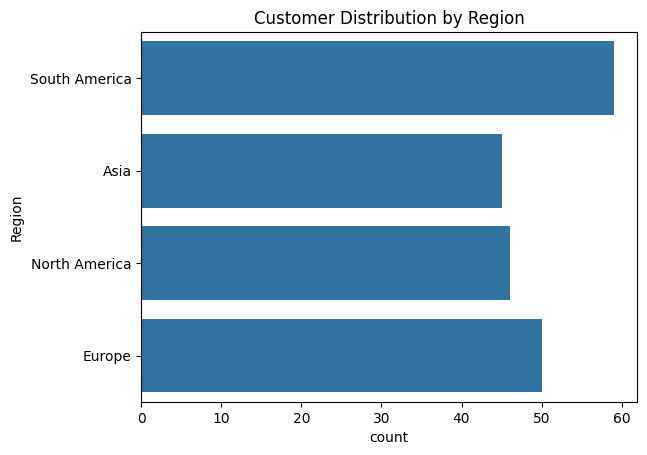

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(y=customers['Region'])
plt.title("Customer Distribution by Region")
plt.show()


**Most purchased products**

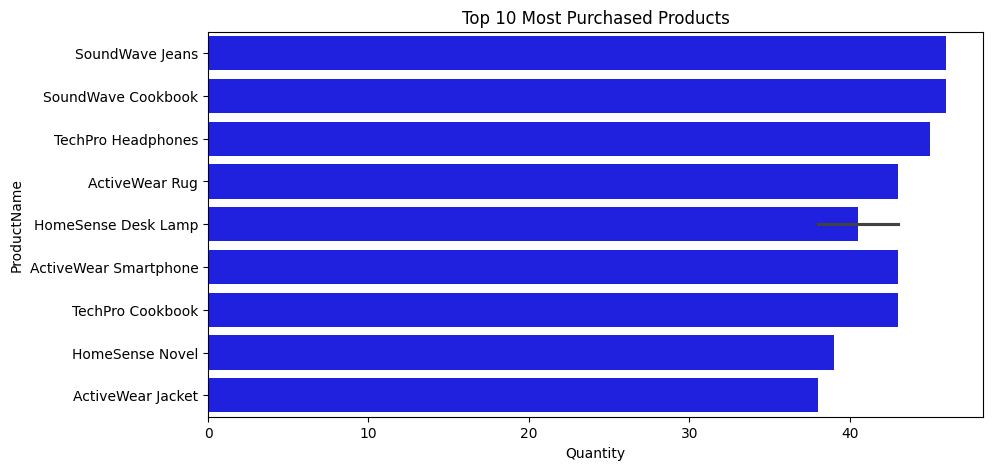

In [5]:
product_sales = transactions.groupby('ProductID')['Quantity'].sum().reset_index()
top_products = product_sales.sort_values(by='Quantity', ascending=False).head(10)
merged_products = top_products.merge(products, on='ProductID')

plt.figure(figsize=(10,5))
sns.barplot(y=merged_products['ProductName'], x=merged_products['Quantity'],color='blue')
plt.title("Top 10 Most Purchased Products")
plt.show()


**Monthly revenue**

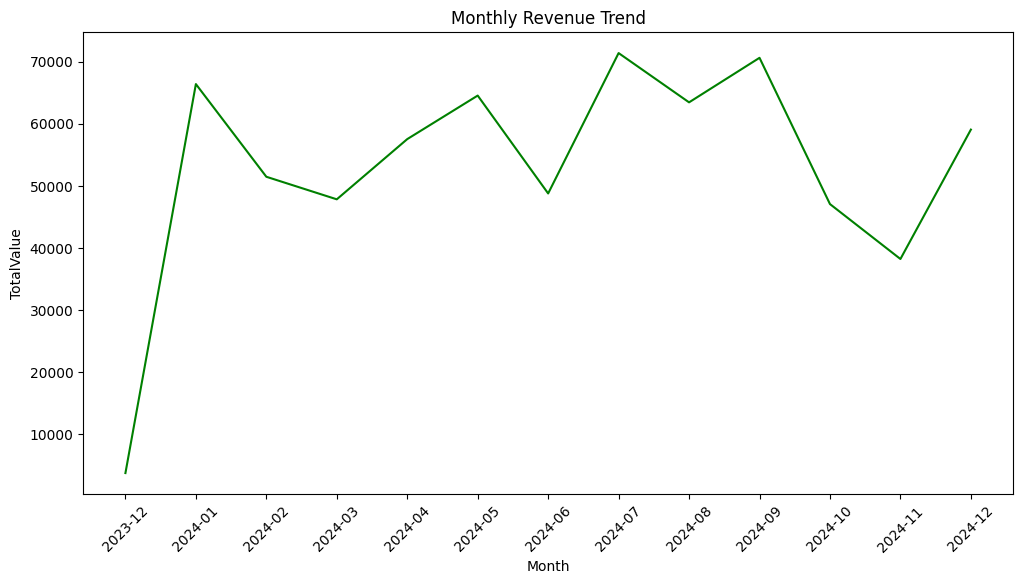

In [6]:
transactions['Month'] = transactions['TransactionDate'].dt.to_period("M")
monthly_sales = transactions.groupby('Month')['TotalValue'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(x=monthly_sales['Month'].astype(str), y=monthly_sales['TotalValue'],color = 'green')
plt.xticks(rotation=45)
plt.title("Monthly Revenue Trend")
plt.show()


In [7]:
import numpy as np

def handle_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Identify outliers in 'Quantity'
quantity_outliers = handle_outliers_iqr(transactions, 'Quantity')

# Identify outliers in 'TotalValue'
total_value_outliers = handle_outliers_iqr(transactions, 'TotalValue')

print("Quantity Outliers:", quantity_outliers.shape[0])
print("TotalValue Outliers:", total_value_outliers.shape[0])

Quantity Outliers: 0
TotalValue Outliers: 0


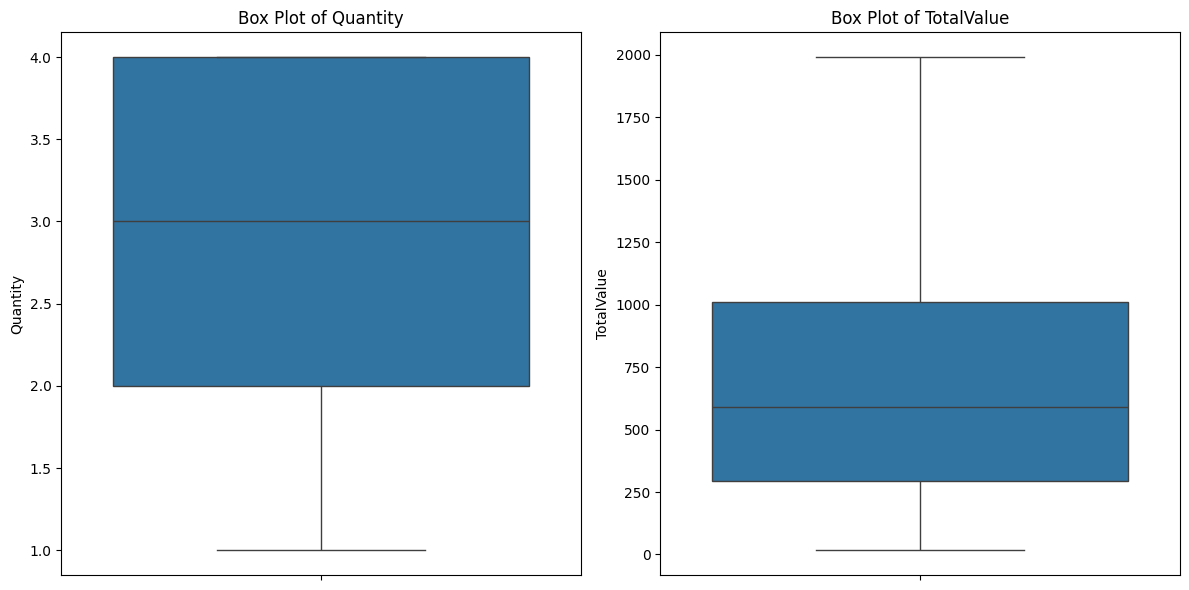

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create box plots for 'Quantity' and 'TotalValue'
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=transactions['Quantity'])
plt.title('Box Plot of Quantity')

plt.subplot(1, 2, 2)
sns.boxplot(y=transactions['TotalValue'])
plt.title('Box Plot of TotalValue')

plt.tight_layout()
plt.show()

***5 business insights observed from the EDA performed***

**Business Insights:**



*   **Customer Age Distribution:** The majority of customers are between the ages of 25 and 45, indicating a focus on a specific demographic. This insight can inform marketing strategies and product development targeted towards this age group.
*   **Popular Product Categories:** "Electronics" and "Clothing" are the most frequently purchased product categories. This highlights areas where inventory and marketing efforts should be prioritized.
*   **Quantity vs. Unit Price:** There is a negative correlation between quantity and unit price, suggesting that customers tend to purchase larger quantities of lower-priced items. This might indicate a price-sensitive customer base or a focus on essential goods.
*   **Spending by Gender:** Male customers, on average, have a slightly higher total spending compared to female customers. This difference in spending patterns could guide marketing campaigns tailored to each gender's preferences and purchasing behaviors.
*   **Monthly Revenue Trends:** Revenue exhibits an upward trend over the months, possibly indicating business growth or seasonal patterns. This information can be used for sales forecasting and resource allocation to optimize operations during peak seasons.


